# **사전준비 for windows**
window 기본 폰트인 맑은고딕으로 설정한다. 
window에 설치된 jupyter notebook kernel에서 실행할 때 사용한다.
(colab으로 진행할 경우에는 '사전준비 for colab' 만 실행하면 된다

In [1]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 


In [2]:
# 폰트의 경로를 통해 사용할 폰트 (맑은고딕)를 지정한다.

path = r'C:\Windows\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
mpl.rc('font', family=font_name)    # 맑은고딕으로 설정
mpl.rcParams['axes.unicode_minus'] = False  # - 부호 오류 보정

Malgun Gothic


# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'

## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [ ]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 

In [ ]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

In [ ]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False

# **분석 주요 라이브러리 임포트**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# **3. 온라인 판매 데이터 분석**

## **3.1 문제정의**
코로나로 인해서 온라인 판매가 증가 하였다고 한다. 


1.   모든 상품의 판매가 증가한 것일까? (배달음식은 늘어났을 것 같은데, 콘서트 티켓은 줄었을 것 같다.)
2.   인터넷 쇼핑보다는 모바일 쇼핑이 증가하고 있을 것 같다.



## **3.2 데이터 수집**
KOSIS 국가 통계 포털에서 '온라인쇼핑몰 판매매체별/상품군별거래액' 에서 데이터를 다운로드 받는다. 
* KOSIS는 데이터를 다운로드 받기 전에 형태를 수정 할 수 있다.  이를 활용하여 정돈된 데이터 형태로 변환 하여 다운로드 받는다. 

https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10051&conn_path=I2

![온라인판매엑셀](https://github.com/sagelab4data/images/blob/main/online_excel.png?raw=true)



1.   불필요한 상품군별 **합계** /판매매체별 **계** 항목 제외
2.   행렬 전환으로 컬럼 방향으로 펼쳐진 시간축을 행(인덱스 방향으로 변경)
3.   데이터 수집 기간을 변경 (2017.1~2020.9)
4.   엑셀에서 시점에 붙어 있는 '2020.08 p)' 의 'p)'의 처리
   - 홈 - 찾기 및 선택 - 바꾸기 (또는 Ctrl - H) 
   - 찾을 내용:  p),  바꿀 내용 : *(공백)*  --> 모두 바꾸기 수행





In [4]:
# 3.2.1 KOSIS에서 정돈한 형태의 데이터를 읽어 들인다. 
online = pd.read_excel('https://github.com/sagelab4data/first_da_2021_1/blob/main/Day04_Online_Channel_Product_Sales.xlsx?raw=true')
online.tail(10)

,상품군별,판매매체별,시점,데이터
2290,기타,모바일쇼핑,2020. 05,213462
2291,기타,모바일쇼핑,2020. 06,184027
2292,기타,모바일쇼핑,2020. 07,202260
2293,기타,모바일쇼핑,2020. 08,258180
2294,기타,모바일쇼핑,2020. 09,180287
2295,기타,모바일쇼핑,2020. 10,168140
2296,기타,모바일쇼핑,2020. 11,200252
2297,기타,모바일쇼핑,2020. 12,212305
2298,기타,모바일쇼핑,2021. 01,169747
2299,기타,모바일쇼핑,2021. 02,154339


## **3.3 데이터 가공**


**online 판매 데이터 항목 분석**
  - 판매 매체별 : 2개 채널
    *   '모바일쇼핑', '인터넷쇼핑'
  - 상품군별 : 23개 상품군
    *  'e쿠폰서비스', '가구', '가방', '가전·전자·통신기기', '기타', '기타서비스',<br>
       '농축수산물','문화 및 레저서비스', '사무·문구', '생활용품', '서적',<br> 
       '스포츠·레저용품', '신발', '아동·유아용품','애완용품', '여행 및 교통서비스', <br>
       '음·식료품', '음식서비스', '의복', '자동차 및 자동차용품',<br>
       '컴퓨터 및 주변기기', '패션용품 및 액세서리', '화장품'<br>
  - 판매연월 : 50개월
    * 2017년 1월~ 2021년 2월  



In [5]:
# 3.3.1  online 데이터 형태의 확인
online.shape

(2300, 4)

In [6]:
# 3.3.2 online  데이터의 자료형 확인
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품군별    2300 non-null   object
 1   판매매체별   2300 non-null   object
 2   시점      2300 non-null   object
 3   데이터     2300 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 72.0+ KB


In [7]:
# 3.3.3 시점 데이터를 날자형으로 변경
online['시점'] = pd.to_datetime(online['시점'])
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   상품군별    2300 non-null   object        
 1   판매매체별   2300 non-null   object        
 2   시점      2300 non-null   datetime64[ns]
 3   데이터     2300 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 72.0+ KB


In [66]:
# 3.3.4 정돈된 데이터
online.head(52)

,상품군별,판매매체별,시점,데이터
0,컴퓨터 및 주변기기,인터넷쇼핑,2017-01-01,288391
1,컴퓨터 및 주변기기,인터넷쇼핑,2017-02-01,329143
2,컴퓨터 및 주변기기,인터넷쇼핑,2017-03-01,322089
3,컴퓨터 및 주변기기,인터넷쇼핑,2017-04-01,251604
4,컴퓨터 및 주변기기,인터넷쇼핑,2017-05-01,241871
5,컴퓨터 및 주변기기,인터넷쇼핑,2017-06-01,262908
6,컴퓨터 및 주변기기,인터넷쇼핑,2017-07-01,252949
7,컴퓨터 및 주변기기,인터넷쇼핑,2017-08-01,280831
8,컴퓨터 및 주변기기,인터넷쇼핑,2017-09-01,270647
9,컴퓨터 및 주변기기,인터넷쇼핑,2017-10-01,235350


## **3.4 데이터 모델링 (분석) 및 시각화**



1.   시점별 판매량 분석 및 시각화 ( online_by_time)
2.   상품군별 시점별 판매량 분석 및 시각화 (online_by_time_prod)
3.   매체별 시점별 판매량 분석 및 시각화 (online_by_time_channel)
4.   상품군별 매체별 시점별 판매량 분석 및 시각화 (online_by_time_prod_channel)
5.   상품군 별 매체분포 시각화


![온라인판매분석](https://github.com/sagelab4data/images/blob/main/online_pivot.png?raw=true)

### 3.4.1 시점별 판매량 분석



![온라인판매분석_1](https://github.com/sagelab4data/images/blob/main/online_pivot_1.png?raw=true)

In [9]:
# 3.4.1.1 '시점' 별로 '데이터'를 합산한다. 

online_by_time = online.groupby('시점').sum()
online_by_time.tail()

,데이터
시점,
2020-10-01,13884208
2020-11-01,15031418
2020-12-01,15891205
2021-01-01,15077083
2021-02-01,13762802


In [11]:
# 3.4.1.2 데이터 건수 확인 (2017.01~2021.02 : 12*4 + 1 = 50 행)
online_by_time.shape

(50, 1)

In [12]:
# 3.4.1.3 데이터 자료형 확인
online_by_time.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2017-01-01 to 2021-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   데이터     50 non-null     int64
dtypes: int64(1)
memory usage: 800.0 bytes


### 3.4.1.1 시점별 판매량 시각화 (online_by_time)

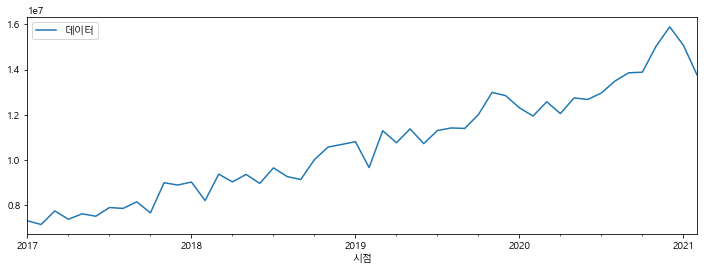

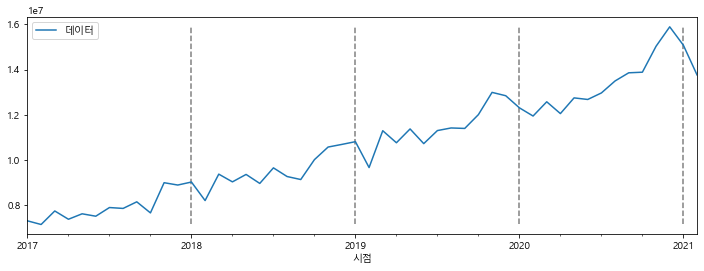

In [68]:
# 3.4.1.1 온라인 판매량 합계 추이를 꺾은선 그래프로 나타내고 관찰한다. 

online_by_time.plot(figsize=(12, 4))

# 3.4.1.2 온라인 판매량 합계 추이에 연도별 세로 선을 그어 주기를 관찰해보자.
online_by_time.plot(kind = 'line', figsize = (12,4));

# 연도를 표현하는 세로선의 위치 지정
x18 = np.datetime64('2018-01-01') 
x19 = np.datetime64('2019-01-01')
x20 = np.datetime64('2020-01-01')
x21 = np.datetime64('2021-01-01')

# 세로선의 하단과 상단 지정 (최소 최대값)
ymin = online_by_time.min()
ymax = online_by_time.max()

# 4 개의 세로선 긋기
plt.vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--');

* 증가 추세가 관찰 되기는 하나, 2017~2019년 대비 급격하게 증가하는 느낌을 받지는 못한다. 

### 3.4.2 상품군별 시점별 판매량 분석



![온라인판매분석_2](https://github.com/sagelab4data/images/blob/main/online_pivot_2.png?raw=true)

#### [] 피봇테이블 : 데이터 집계 수행


```
데이터프레임. pivot_table(index = ‘행으로 만들 컬럼’, 
                         columns = ＇열방향으로 만들 컬럼’,
                         values= ＇집계할 값’ 컬럼,
                         aggfunc = ‘집계함수’)
```



![피봇테이블](https://github.com/sagelab4data/images/blob/main/pivot_table.png?raw=true)

In [13]:
# 3.4.2.1 상품군별 시점별로 피봇 테이블을 구성
online_by_time_prod = online.pivot_table(index = '시점',
                                         columns = '상품군별',
                                         values = '데이터', 
                                         aggfunc = 'sum')
online_by_time_prod.head()

상품군별,e쿠폰서비스,가구,가방,가전·전자·통신기기,기타,기타서비스,농축수산물,문화 및 레저서비스,사무·문구,생활용품,...,아동·유아용품,애완용품,여행 및 교통서비스,음·식료품,음식서비스,의복,자동차 및 자동차용품,컴퓨터 및 주변기기,패션용품 및 액세서리,화장품
시점,,,,,,,,,,,,,,,,,,,,,
2017-01-01,88648,188601,143643,602122,144493,65598,259029,164254,53192,592310,...,259790,53096,1215463,675850,183356,864515,80144,422384,143439,654145
2017-02-01,80796,219175,163204,626874,141579,40733,167546,123892,60404,607119,...,262204,62005,1110440,573082,173924,827672,76677,475343,146885,729228
2017-03-01,90149,240687,168661,667726,175648,35946,194150,138133,70006,619493,...,300199,65265,1072596,641670,192095,1042742,81297,473351,165677,715295
2017-04-01,84933,206023,159399,716708,163064,53217,176139,119599,61954,575324,...,293596,59383,1134841,652913,196544,972647,80513,368279,165182,583335
2017-05-01,98613,201439,152371,861617,164517,43490,175762,133785,57238,600557,...,274565,56112,1181896,633353,210565,978234,87212,350924,168702,622852


In [14]:
# 3.4.2.2 데이터 건수 확인 ( 45행 x 23열 (상품군 개수))
online_by_time_prod.shape

(50, 23)

In [15]:
# 3.4.2.3 데이터 자료형 확인
online_by_time_prod.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2017-01-01 to 2021-02-01
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   e쿠폰서비스       50 non-null     int64
 1   가구           50 non-null     int64
 2   가방           50 non-null     int64
 3   가전·전자·통신기기   50 non-null     int64
 4   기타           50 non-null     int64
 5   기타서비스        50 non-null     int64
 6   농축수산물        50 non-null     int64
 7   문화 및 레저서비스   50 non-null     int64
 8   사무·문구        50 non-null     int64
 9   생활용품         50 non-null     int64
 10  서적           50 non-null     int64
 11  스포츠·레저용품     50 non-null     int64
 12  신발           50 non-null     int64
 13  아동·유아용품      50 non-null     int64
 14  애완용품         50 non-null     int64
 15  여행 및 교통서비스   50 non-null     int64
 16  음·식료품        50 non-null     int64
 17  음식서비스        50 non-null     int64
 18  의복           50 non-null     int64
 19  자동차 및 자동차용품  50 non-null     int

### 3.4.2.1 상품군별 시점별 판매량 시각화 (online_by_time_prod)

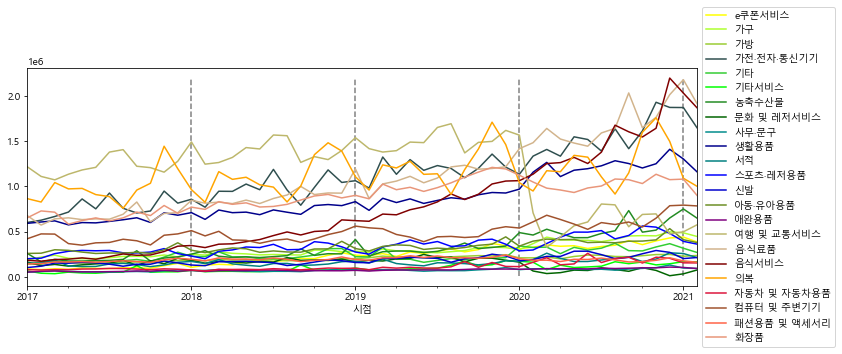

In [70]:
# 3.4.2.1 상품군별로 시각화하기에 앞서, 색상을 지정해 둔다.

# 상품군별 색상
prod_colors = ['yellow', 'greenyellow', 'yellowgreen','darkslategray','limegreen',
               'lime', 'forestgreen','darkgreen', 'darkcyan','darkblue',
               'teal', 'blue','mediumblue','olivedrab','purple',
                'darkkhaki','tan', 'maroon', 'orange','crimson',
               'sienna', 'tomato', 'darksalmon']

# 판매매체별 색상
channel_colors = [ 'red', 'blue']

# 3.4.2.2 온라인 판매량의 추이를 꺾은선 그래프로 나타내고 관찰한다. 


online_by_time_prod.plot(kind = 'line', figsize = (12,4), 
                         color = prod_colors) # color = prod_colors 로 색상지정
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 범례 위치 조정


# 연도가 바뀌는 위치에서 3개의 세로선을 긋는다. (X변수는 재지정 할 필요 없음)
# 세로선의 하단과 상단 지정 (최소 최대값)
ymin = online_by_time_prod.min().min()
ymax = online_by_time_prod.max().max()

# 3 개의 가로선 긋기
plt.vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--');

* 뚝 떨어지는 올리브색 (여행 및 교통 서비스) 을 비롯하여 저조해지는 상품군이 관찰되고
* 베이지색의 상승 되는 모습이 보이지만
* 전체적으로 엉켜서 현상이 잘 관찰 되지 않는다. 

#### [] for 문 연습

```
# 목록의 값을 차례로 변수로 받아 실행한다. 
for 변수 in 목록 : 
    실행문1
    실행문2
```

```
# 숫자 1,2,3 목록에서 차례로 a 의 값이 변하여 전달 되고 그 값이 출력된다. 
for a in [1,2,3] : 
    print (a)
    print (a*a)
```


```
# enumerate는 목록의 항목값과 함께, 순차적인 번호를 부여한다. 
for i, v in enumerate (['a','b','c']):
    print ( n, v)

```

In [71]:
# 3.4.2.3.1 for문 연습1
# 숫자 1,2,3 목록에서 차례로 a 의 값이 변하여 전달 되고 그 값이 출력된다.
for a in [1, 2, 3]:
    print(a)
    print(a*a)

1
1
2
4
3
9


In [72]:
# 3.4.2.3.2 for문 연습2
# enumerate는 목록의 항목값과 함께, 순차적인 번호를 부여한다. 
for i, v in enumerate (['a','b','c']):
    print ( i, v)

0 a
1 b
2 c


In [73]:
# 3.4.2.3.3 for문 연습 3 - 차트 그릴 때 사용할 for 문
for i, col in enumerate (online_by_time_prod.columns) :
    print (i,col)

0 e쿠폰서비스
1 가구
2 가방
3 가전·전자·통신기기
4 기타
5 기타서비스
6 농축수산물
7 문화 및 레저서비스
8 사무·문구
9 생활용품
10 서적
11 스포츠·레저용품
12 신발
13 아동·유아용품
14 애완용품
15 여행 및 교통서비스
16 음·식료품
17 음식서비스
18 의복
19 자동차 및 자동차용품
20 컴퓨터 및 주변기기
21 패션용품 및 액세서리
22 화장품


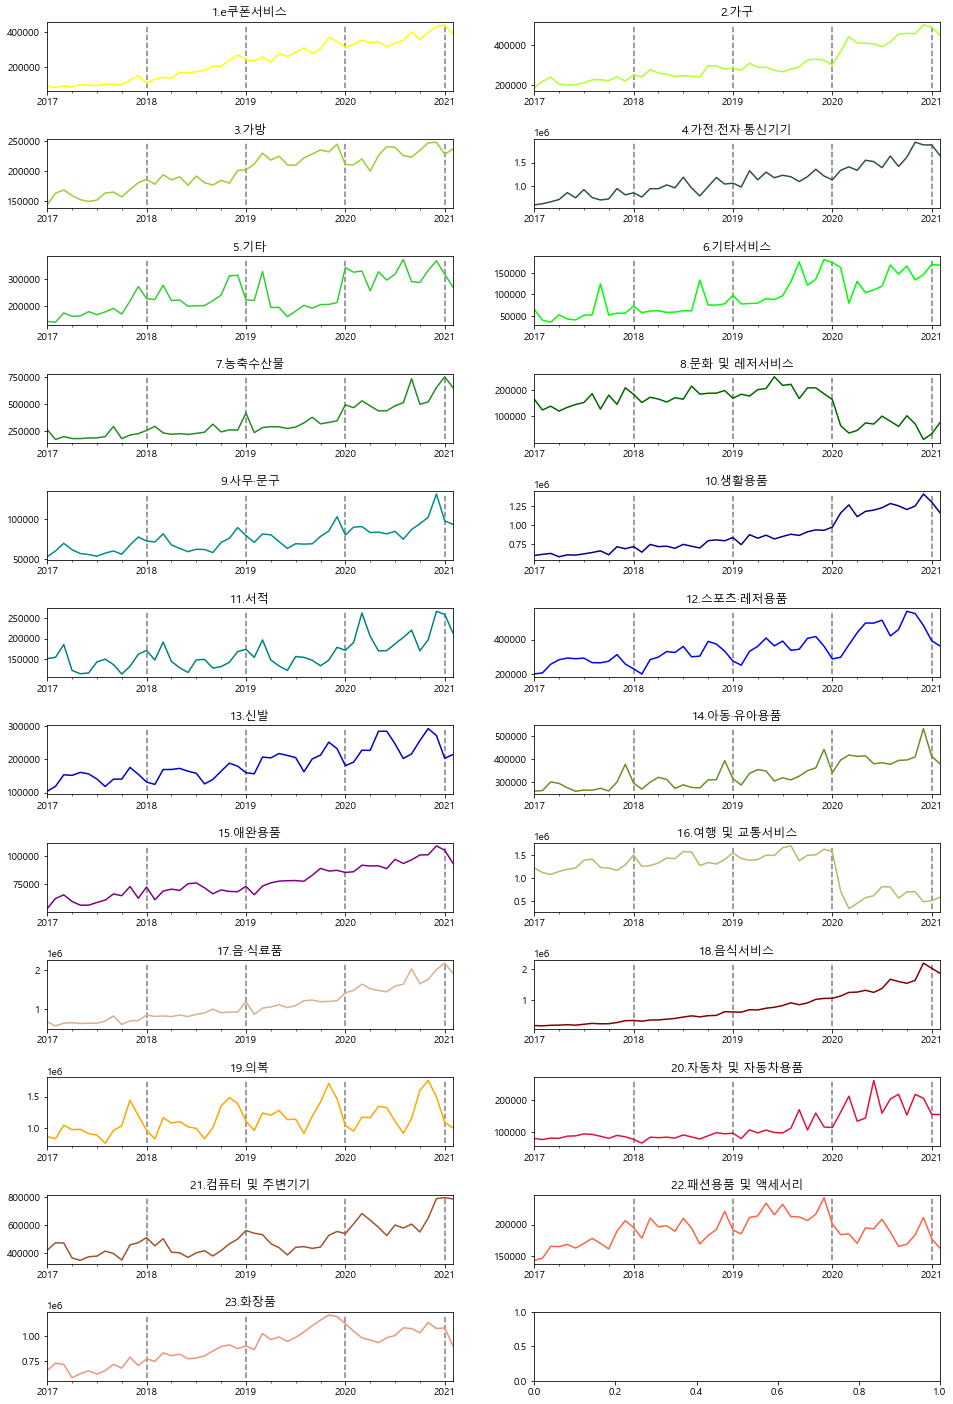

In [74]:
# 3.4.2.4  서브플롯을 이용해서 각각의 상품군별로 추이를 살펴보자

# 23개의 상품군별이므로 12행 2열 24개의 그래프 생성
fig, ax = plt.subplots(12 ,2 , figsize = (16, 25))
plt.subplots_adjust(hspace=0.7) # 그래프 간 세로 여백을 좁게 조정

# 24개의 ax 를 순차적으로 작성하기 위해 for 문을 사용하여 반복 한다.
axe = ax.flat # 24개의 ax를 한 줄로 세우기
for i, col in enumerate (online_by_time_prod.columns) :
    online_by_time_prod[col].plot(ax = axe[i], title = str(i+1) + '.'+ col, color = prod_colors[i])
    axe[i].xaxis.label.set_visible(False) # x 축이름 숨기기

    # 세로선 긋기 위한 상한/하한 지정 및 선 긋기
    ymin = online_by_time_prod[col].min()
    ymax = online_by_time_prod[col].max()
    axe[i].vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--')

plt.show()

*   상품군별 판매 동향 추이
  - Q1. 코로나 이후 급격하게 성장한 제품군은? - 컴퓨터, e쿠폰
  - Q2. 코로나로 인하여 제품 판매가 현저하게 줄어든 제품군은? - 문화 및 레저, 여행, 패션용품 액세서리,화장품
  - Q3. 원래 부터 성장세였던 제품군은?
  - Q4. 계절성이 있는 제품군은?
  - Q5. 21.컴퓨터 및 주변 기기에 판매동향에 대해서 해석해보라.
  - Q6. 14.아동유아용품, 19.의복 과 22.패션용품 및 액세서리 에서 나타나는 현상의 공통점과 차이점을 논해보라

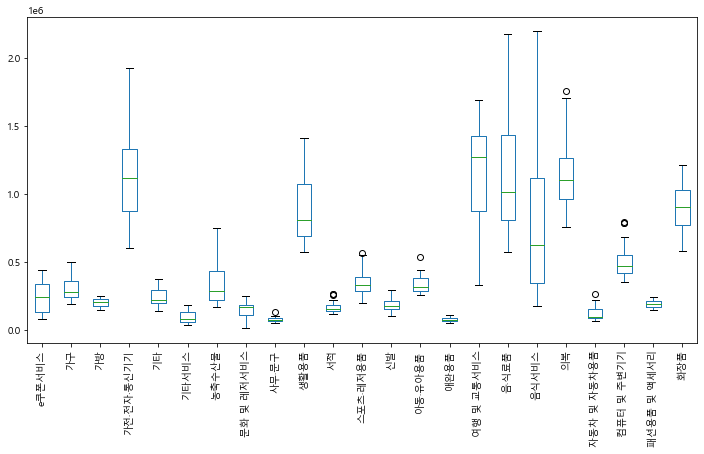

In [77]:
# 3.4.2.5 상자 그래프로 상품군별 판매량의 분포를 표현하고 그 크기의 차이를 이해해보자.

online_by_time_prod.plot(kind = 'box', figsize = (12,6))
plt.xticks(rotation=90);

### 3.4.3 매체별 시점별 판매량 분석



![온라인판매분석_3](https://github.com/sagelab4data/images/blob/main/online_pivot_3.png?raw=true)

In [16]:
# 3.4.3.1 판매매체별 시점별로 피봇 테이블을 구성
online_by_time_channel = online.pivot_table(index = '시점', 
                                            columns = '판매매체별', 
                                            values = '데이터', 
                                            aggfunc = 'sum')
online_by_time_channel.tail()

판매매체별,모바일쇼핑,인터넷쇼핑
시점,,
2020-10-01,9503755,4380453
2020-11-01,10190966,4840452
2020-12-01,11073744,4817461
2021-01-01,10599756,4477327
2021-02-01,9733826,4028976


In [17]:
# 3.4.3.2 데이터 건수 확인 ( 45행 x 2열 (판매매체 개수))
online_by_time_channel.shape

(50, 2)

In [18]:
# 3.4.3.3 데이터 자료형 확인
online_by_time_channel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2017-01-01 to 2021-02-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   모바일쇼핑   50 non-null     int64
 1   인터넷쇼핑   50 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


### 3.4.3.1 매체별 시점별 판매량 시각화 (online_by_time_channel)

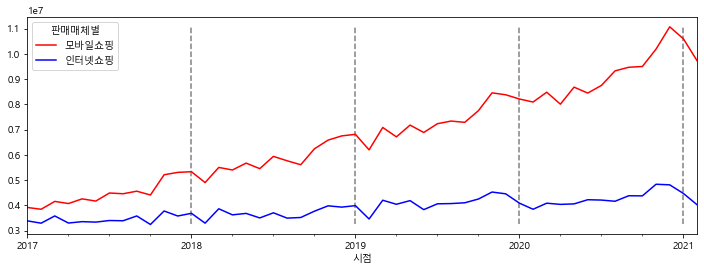

In [76]:
# 3.4.3.1 판매매체별 온라인 판매량 합계 추이에 연도별 세로 선을 그어 주기를 관찰해보자.
online_by_time_channel.plot(kind = 'line', figsize = (12,4), color = channel_colors);


# 세로선의 하단과 상단 지정 (최소 최대값)
ymin = online_by_time_channel.min().min()
ymax = online_by_time_channel.max().max()

# 3 개의 가로선 긋기
plt.vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--');

* 모바일 쇼핑과 인터넷 쇼핑이 주기 (등락:오르고 내리고) 관점에서 비슷하게 나타나지만, 모바일 쇼핑이 보다 빠르게 성장하고 있는 것으로 보인다. 

### 3.4.4 상품군별 시점별 판매량 분석



![온라인판매분석_4](https://github.com/sagelab4data/images/blob/main/online_pivot_4.png?raw=true)

In [19]:
# 3.4.4.1 상품군별 시점별로 피봇 테이블을 구성
online_by_time_prod_channel = online.pivot_table(index = '시점', 
                                                 columns = ['상품군별','판매매체별' ], 
                                                 values = '데이터', aggfunc = 'sum')
online_by_time_prod_channel.tail()

상품군별        e쿠폰서비스             가구              가방        가전·전자·통신기기          \
판매매체별        모바일쇼핑  인터넷쇼핑   모바일쇼핑   인터넷쇼핑   모바일쇼핑  인터넷쇼핑      모바일쇼핑   인터넷쇼핑   
시점                                                                            
2020-10-01  298375  58275  322488  133811  185255  49545     986053  626691   
2020-11-01  340209  58307  315001  138798  191000  56394    1146215  783551   
2020-12-01  378919  51820  347823  150034  194812  53679    1144449  728265   
2021-01-01  383584  56896  348851  138472  181101  47105    1173695  697795   
2021-02-01  332834  53893  323609  123447  188568  48788    1063717  583774   

상품군별            기타          ...       의복         자동차 및 자동차용품         \
판매매체별        모바일쇼핑   인터넷쇼핑  ...    모바일쇼핑   인터넷쇼핑       모바일쇼핑  인터넷쇼핑   
시점                          ...                                       
2020-10-01  168140  119404  ...  1053679  544156       93194  60263   
2020-11-01  200252  130998  ...  1128543  629357      121261  96470   
2020-12-01  212305  155136  ...   974699  522339      125728  80065   
2021-01-01  169747  147185  ...   722252  368134      109968  45534   
2021-02-01  154339  116010  ...   682869  318447       93733  61048   

상품군별       컴퓨터 및 주변기기         패션용품 및 액세서리            화장품          
판매매체별           모바일쇼핑   인터넷쇼핑       모바일쇼핑  인터넷쇼핑   모바일쇼핑   인터넷쇼핑  
시점                                                                
2020-10-01     227738  323962      121415  47449  441619  590253  
2020-11-01     286321  362768      129181  54549  486511  647938  
2020-12-01     325899  460931      151922  59215  517825  556827  
2021-01-01     343664  449691      129168  48166  501244  579400  
2021-02-01     342479  442188      120525  42362  462629  437933  

[5 rows x 46 columns]

In [20]:
# 3.4.4.2 데이터 건수 확인 ( 45행 x 46열 (상품군 23 * 매체 2))
online_by_time_prod_channel.shape

(50, 46)

In [21]:
# 3.4.4.3 데이터 자료형 확인
online_by_time_prod_channel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2017-01-01 to 2021-02-01
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   (e쿠폰서비스, 모바일쇼핑)       50 non-null     int64
 1   (e쿠폰서비스, 인터넷쇼핑)       50 non-null     int64
 2   (가구, 모바일쇼핑)           50 non-null     int64
 3   (가구, 인터넷쇼핑)           50 non-null     int64
 4   (가방, 모바일쇼핑)           50 non-null     int64
 5   (가방, 인터넷쇼핑)           50 non-null     int64
 6   (가전·전자·통신기기, 모바일쇼핑)   50 non-null     int64
 7   (가전·전자·통신기기, 인터넷쇼핑)   50 non-null     int64
 8   (기타, 모바일쇼핑)           50 non-null     int64
 9   (기타, 인터넷쇼핑)           50 non-null     int64
 10  (기타서비스, 모바일쇼핑)        50 non-null     int64
 11  (기타서비스, 인터넷쇼핑)        50 non-null     int64
 12  (농축수산물, 모바일쇼핑)        50 non-null     int64
 13  (농축수산물, 인터넷쇼핑)        50 non-null     int64
 14  (문화 및 레저서비스, 모바일쇼핑)   50 non-null     int64
 15  (문화 및 레저서비스, 인터넷쇼핑)   50 non-null     i

In [22]:
# 3.4.4.4 pivot 을 이용해서도 동일하게 생성할 수 있다. (중복되는 행이 없어서)
online.pivot(index = '시점', 
             columns = ['상품군별','판매매체별' ], 
             values = '데이터')

상품군별       컴퓨터 및 주변기기         가전·전자·통신기기               서적          사무·문구  \
판매매체별           인터넷쇼핑   모바일쇼핑      인터넷쇼핑    모바일쇼핑   인터넷쇼핑   모바일쇼핑  인터넷쇼핑   
시점                                                                         
2017-01-01     288391  133993     307496   294626  103851   47379  37233   
2017-02-01     329143  146200     328088   298786  106649   47680  41550   
2017-03-01     322089  151262     349185   318541  126052   59519  45751   
2017-04-01     251604  116675     366894   349814   82291   40127  41721   
2017-05-01     241871  109053     417717   443900   78606   35774  39428   
2017-06-01     262908  113811     366554   385920   78615   37657  37788   
2017-07-01     252949  128025     432760   494107   95733   47351  35743   
2017-08-01     280831  135562     359011   399471  100090   49898  38125   
2017-09-01     270647  128865     343507   363151   88774   47891  39683   
2017-10-01     235350  118174     333413   394994   72439   41293  37422   
2017-11-01     302907  157832     462529   485981   87946   44577  44129   
2017-12-01     320177  155301     387969   427298  103589   58092  50562   
2018-01-01     324233  187441     398999   459257  107123   64132  46397   
2018-02-01     275786  177621     351716   418685   93094   54689  46450   
2018-03-01     310948  193113     435766   510861  121120   70476  51251   
2018-04-01     243815  165240     420663   524596   91304   52865  41862   
2018-05-01     237559  166676     447810   578323   81391   47734  39157   
2018-06-01     220404  151440     424143   539531   72096   45257  36238   
2018-07-01     239475  164775     511557   676637   90323   57737  37606   
2018-08-01     249200  169705     424778   535814   91948   57276  37810   
2018-09-01     226280  155899     340868   451538   77468   50715  33529   
2018-10-01     254118  165626     429553   559968   80587   51156  41333   
2018-11-01     275284  192882     517411   664944   86299   56107  43264   
2018-12-01     294467  206895     470859   573086  102843   65657  50853   
2019-01-01     329496  232016     451529   611551  100029   73920  42332   
2019-02-01     305306  237163     403124   578935   90350   63967  37243   
2019-03-01     313340  219156     568865   756020  114766   81975  43678   
2019-04-01     279362  189807     523731   610496   86671   61239  44447   
2019-05-01     263783  176325     577082   719082   78172   55150  38273   
2019-06-01     240539  148657     488946   688858   70403   52055  32913   
2019-07-01     271299  171823     522133   708286   89520   66886  36270   
2019-08-01     269744  178221     511230   687235   88775   65476  36165   
2019-09-01     261053  174623     462355   634009   82034   65084  35372   
2019-10-01     274936  170182     525905   674287   75696   58084  38660   
2019-11-01     306368  221639     568012   789341   84329   63125  42881   
2019-12-01     339917  214960     518944   694448   99281   79550  49822   
2020-01-01     301925  238309     448582   685416   88986   82439  37712   
2020-02-01     329884  278782     549920   784721  101893   88641  40423   
2020-03-01     377158  304573     582588   826010  138724  123680  38970   
2020-04-01     354329  280447     566950   767352  107302   98270  36508   
2020-05-01     337425  246569     605211   942818   92404   77605  36296   
2020-06-01     314965  210993     591071   927580   91448   79271  37294   
2020-07-01     360071  240302     548307   842591   99074   88038  38493   
2020-08-01     317309  261989     606195  1030839  106634   96318  31482   
2020-09-01     340378  266509     526924   889874  115167  105396  37859   
2020-10-01     323962  227738     626691   986053   90674   79516  41280   
2020-11-01     362768  286321     783551  1146215  103428   93638  45514   
2020-12-01     460931  325899     728265  1144449  138813  127634  55776   
2021-01-01     449691  343664     697795  1173695  127000  131758  38984   
2021-02-01     442188  342479     583774  106371

### 3.4.4.1   상품군별 매체별 시점별 판매량 시각화 (online_by_time_prod_channel)

In [38]:
online_by_time_prod_channel.columns.levels[0]

Index(['e쿠폰서비스', '가구', '가방', '가전·전자·통신기기', '기타', '기타서비스', '농축수산물',
       '문화 및 레저서비스', '사무·문구', '생활용품', '서적', '스포츠·레저용품', '신발', '아동·유아용품',
       '애완용품', '여행 및 교통서비스', '음·식료품', '음식서비스', '의복', '자동차 및 자동차용품',
       '컴퓨터 및 주변기기', '패션용품 및 액세서리', '화장품'],
      dtype='object', name='상품군별')

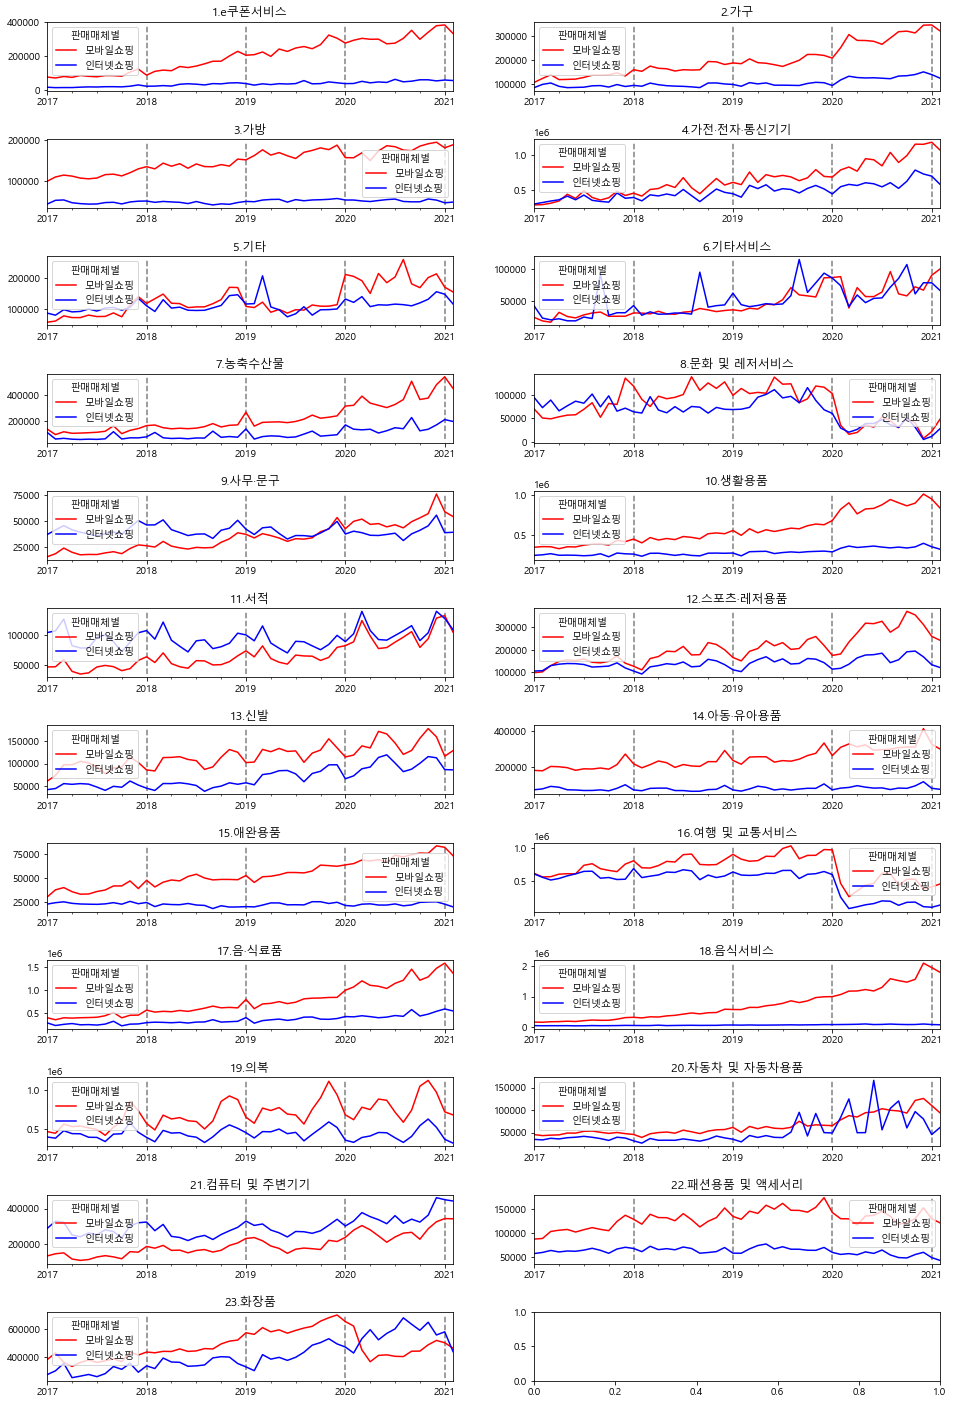

In [78]:
# 3.4.4.1  서브플롯을 이용해서 각각의 상품군별로 추이를 살펴보자

# 23개의 상품군별이므로 12행 2열 24개의 그래프 생성
fig, ax = plt.subplots(12 ,2 , figsize = (16, 25))
plt.subplots_adjust(hspace=0.7) # 그래프 간 세로 여백을 좁게 조정

# 24개의 ax 를 순차적으로 작성하기 위해 for 문을 사용하여 반복 한다.
axe = ax.flat # 24개의 ax를 한 줄로 세우기
for i, col in enumerate (online_by_time_prod_channel.columns.levels[0]) :
    online_by_time_prod_channel[col].plot(ax = axe[i], title = str(i+1) + '.'+ col, color = channel_colors)
    axe[i].xaxis.label.set_visible(False) # x 축이름 숨기기

    # 세로선 긋기 위한 상한/하한 지정 및 선 긋기
    ymin = min(online_by_time_prod_channel[col].min())
    ymax = max(online_by_time_prod_channel[col].max())
    axe[i].vlines(x = [x18, x19, x20, x21], ymin = ymin, ymax= ymax, color = 'gray', linestyle = '--')

plt.show()

In [ ]:
# 파란색 : 인터넷 쇼핑 > 모바일 쇼핑 : 사무문구, 서적, 여행, 컴퓨터
# 이유(특징) : 검색할 정보가 많은 분야, 고관여 제품, 사무용품(대량 구매자, 다품종 구매자- 학교, 사무실)

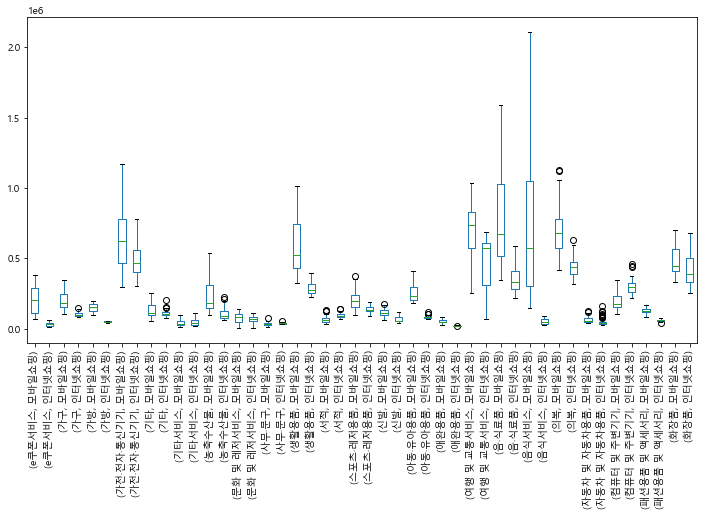

In [41]:
# 3.4.4.2  상자 그래프로 상품군별 판매량의 분포를 표현하고 그 크기의 차이를 이해해보자.

online_by_time_prod_channel.plot(kind = 'box', figsize = (12,6))
plt.xticks(rotation=90);

In [61]:
#복잡한 boxplot 그래프를 seaborn 을 이용하여 이해하기 쉽게 그려보자

#### [] seaborn library 그래프 맛보기
* 약자는 sns


```
# import seaborn as sns
```


* 데이터 가공을 seaborn library에서 수행한다.

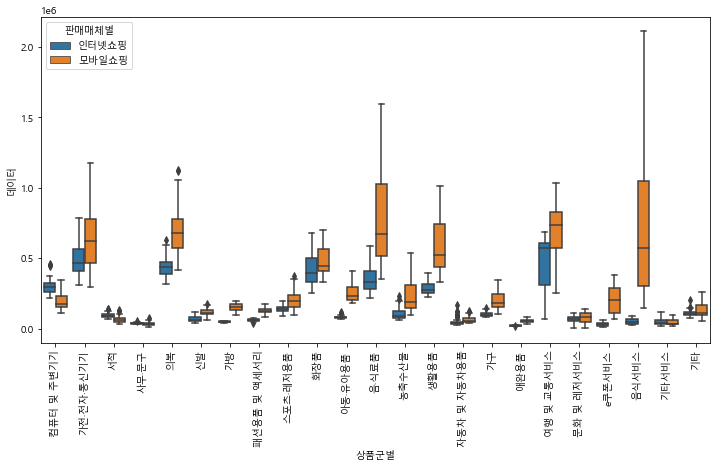

In [62]:
# 3.4.4.3  유사한 그래프를 seaborn library의 상자 그래프로 작성해보자
plt.figure(figsize = (12,6))
sns.boxplot(data = online, x='상품군별', y = '데이터', hue = '판매매체별');
plt.xticks(rotation=90);

### 3.4.5 상품군 별 매체분포
상품군과 매체만의 관계를 살펴보자

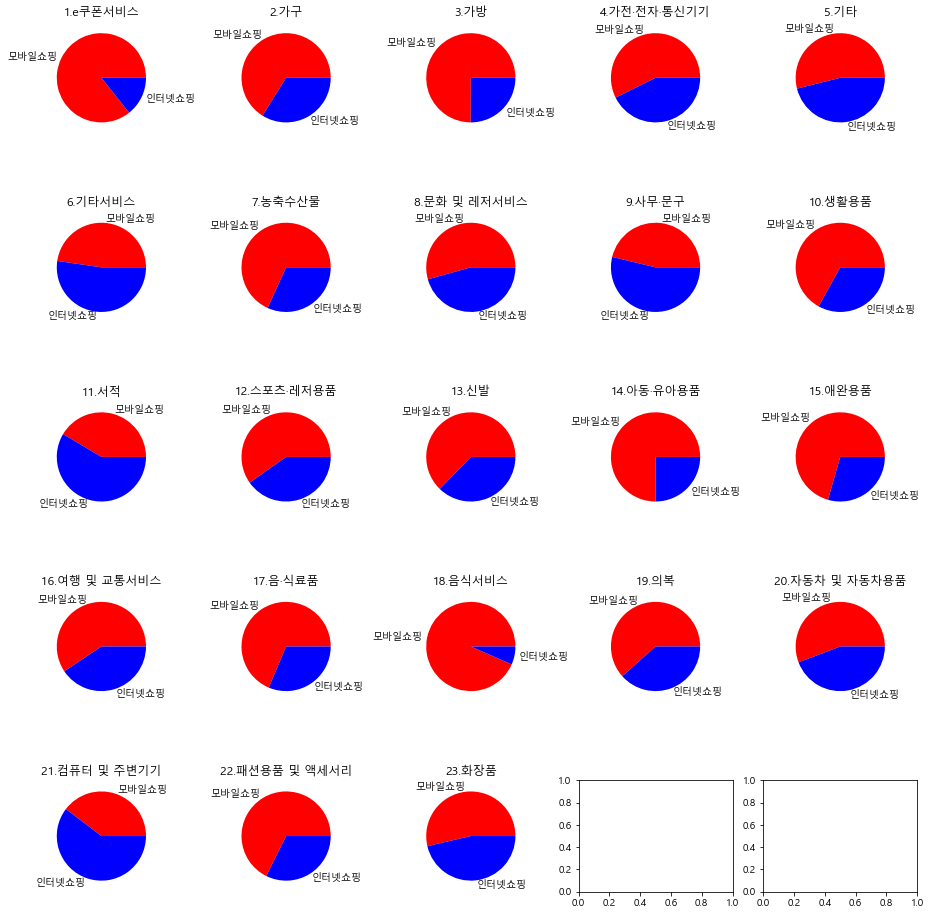

In [63]:
# 3.4.5.1  상품군별 매체분포를  원 그래프로 작성해보자

# 데이터를 상품군별 매체별로 집계

online_by_channel_prod = online.pivot_table(index = '판매매체별', columns = '상품군별',
                                            values = '데이터', aggfunc= 'sum')


# 23개의 상품군별이므로 5행 5열 25개의 그래프 생성
fig, ax = plt.subplots(5 ,5 , figsize = (16, 16))
plt.subplots_adjust(hspace=0.7) # 그래프 간 세로 여백을 좁게 조정


# 25개의 ax 를 순차적으로 작성하기 위해 for 문을 사용하여 반복 한다.
axe = ax.flat # 24개의 ax를 한 줄로 세우기
for i, col in enumerate (online_by_channel_prod.columns) :
    online_by_channel_prod[col].plot.pie( ax = axe[i], 
                                         y=col, 
                                         title = str(i+1) + '.'+ col,
                                         colors = channel_colors,
                                         ylabel = "")
    

    
plt.show()

* 대체로 모바일 쇼핑의 비중이 크다.
* 상대적으로 인터넷 쇼핑이 큰 종목을 골라서 그 이유를 생각해보자

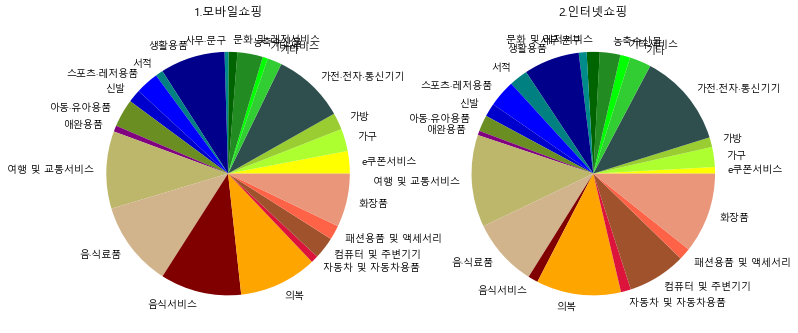

In [79]:
# 3.4.5.2  매체별 상품군 분포를 원 그래프를 작성해보자

# 데이터를 상품군별 매체별로 집계

online_by_prod_channel = online.pivot_table(index = '상품군별', columns = '판매매체별', values = '데이터', aggfunc= 'sum')


# 2개의 매체별이므로 2 열 2개의 그래프 생성
fig, ax = plt.subplots(1 ,2 , figsize = (12, 6))


for i, col in enumerate (online_by_prod_channel.columns) :
    online_by_prod_channel[col].plot.pie( ax = ax[i], 
                                         y=col, 
                                         title = str(i+1) + '.'+ col,
                                         colors = prod_colors,
                                         ylabel = "")

모바일에서 음식 서비스의 비중이 인터넷 대비 큰 것을 확인 할 수 있다.  